# Libraries

In [30]:
library(FFTrees)

library(plyr)
library(tidyverse)
library(DT) # dependency
library(ggthemes) # dependency

# Importing data

In [31]:
responses <- read_csv("data/responses.csv")
questions <- read_csv("data/questions.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  id = col_integer(),
  edad = col_integer(),
  REGION = col_integer(),
  POND = col_double()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  Name = col_character(),
  Type = col_character(),
  Width = col_integer(),
  Decimals = col_integer(),
  Label = col_character(),
  Measure = col_character(),
  Column1 = col_integer()
)


Tidyverse data

In [61]:
data <- responses %>% 
    gather(question, answer, starts_with("P"))

# Columns of interest

### Demographics

In [37]:
questions %>%
    filter(Name == 'comuna' | Name == 'sexo' | Name == 'edad')

Name,Type,Width,Decimals,Label,Measure,Column1
comuna,Numeric,8,0,NA,Scale,NA
sexo,Numeric,1,0,Sexo,Nominal,NA
edad,Numeric,5,0,Cual es su edad (Registrar en años),Scale,NA


### Questions
- `P1`: Problemas que afectan a los jóvenes
- `P2`: Qué acciones consideras violentas
- `P3`: Causas de violencia en el pololeo
- `P4`: Para ti, qué tan aceptable...
- `P5`: Medios de comunicación
- `P6`: Películas
- `P7`: Programas de televisión
- `P8`: Likert scale
- `P9`: Para cuáles corresponde denunciar

In [48]:
questions %>%
    filter(Name == 'P8_2') %>%
    select(Label)

Label
"Qué tan de acuerdo o en desacuerdo estas con: En algunas ocasiones, las mujeres tienen actitudes que justifican que reciba actos de violencia por parte de su pareja"


In [53]:
questions %>%
    filter(Name == 'P16_8') %>%
    select(Label)

Label
"En su entorno cercano, cuán frecuente es que en las relaciones de pareja de jóvenes de su edad: Pelear o discutir por comentarios que la pareja hizo en Facebook o en otra red social"


# Analysis

In [44]:
data %>%
    filter(question == 'P8_2') %>%
    group_by(answer)%>%
    summarize(count = length(answer))

answer,count
De acuerdo,121
En desacuerdo,877
Ni de acuerdo ni en desacuerdo,9
No sabe,5


In [68]:
question = "P16_8"

length <- data %>%
            filter(question == !!question) %>%
            length

data %>%
    filter(question == !!question) %>%
    group_by(answer)%>%
    summarize(count = length(answer),
              percentage = round(count/length, 1))

answer,count,percentage
Frecuente,438,15.1
Muy frecuente,251,8.7
Nada frecuente,87,3.0
No responde,4,0.1
No sabe,11,0.4
Poco frecuente,221,7.6


# FFTrees

In [113]:
fft_data <- data %>%
                add_column(accepts_violence = (data$answer == 'De acuerdo')*1) %>%
                filter(question == 'P8_2') %>%
                select(edad, sexo, accepts_violence)

In [115]:
fft <- FFTrees(  formula = accepts_violence ~.,
                 data = fft_data,
                 #data.test = heart.test,
                 #main = "Heart Disease",
                 #decision.labels = c("Low-Risk", "High-Risk")
              )

Growing FFTs with ifan
Fitting non-FFTrees algorithms for comparison (you can turn this off with comp = FALSE) ...


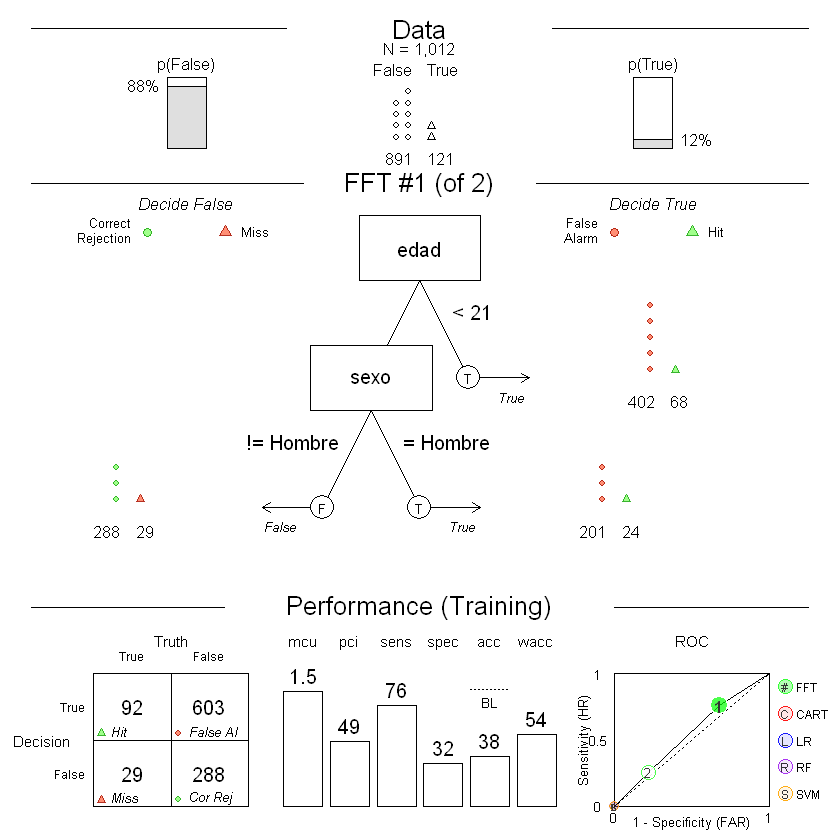

In [119]:
plot(fft, tree=1)